# Курсовой проект
# Фундаментальные концепции искусственного интеллекта
Студент Батов Алексей

Группа М8О-109СВ-24

Ссылка на датасет: https://www.kaggle.com/datasets/neilclack/nyc-taxi-trip-data-google-public-data/data

# NYC Taxi Trip Data

vendor_id - Поставщик

pickup_datetime - Время начала поездки

dropoff_datetime - Время окончания поездки

passenger_count - Количество пассажиров

trip_distance - Расстояние поездки

rate_code - Код тарифа

store_and_fwd_flag

payment_type - Тип оплаты

fare_amount - сумма поездки

extra - Дополнительно

mta_tax - Налог

tip_amount - Чаевые

tolls_amount - Дорожные сборы

imp_surcharge - Надбавка к налогу на прибыль

total_amount - Общая сумма
pickup_location_id - идентификатор места посадки

dropoff_location_id - идентификатор места высадки

# Загрузка данных

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("neilclack/nyc-taxi-trip-data-google-public-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/neilclack/nyc-taxi-trip-data-google-public-data/versions/6


In [ ]:
import pandas as pd
# Укажи путь к распакованному файлу
file_path = "/root/.cache/kagglehub/datasets/neilclack/nyc-taxi-trip-data-google-public-data/versions/6/taxi_trip_data.csv"

# Загружаем CSV в DataFrame
data = pd.read_csv(file_path)

# Смотрим первые строки таблицы
print(data.head())

   vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
0          2  2018-03-29 13:37:13  2018-03-29 14:17:01                1   
1          2  2018-03-29 13:37:18  2018-03-29 14:15:33                1   
2          2  2018-03-29 13:26:57  2018-03-29 13:28:03                1   
3          2  2018-03-29 13:07:48  2018-03-29 14:03:05                2   
4          2  2018-03-29 14:19:11  2018-03-29 15:19:59                5   

   trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
0          18.15          3                  N             1         70.0   
1           4.59          1                  N             1         25.0   
2           0.30          1                  N             1          3.0   
3          16.97          1                  N             1         49.5   
4          14.45          1                  N             1         45.5   

   extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
0    0.0  

# Статистика

In [ ]:
print(f"Размер набора данных: {data.shape}")

Размер набора данных: (10000000, 17)


Типы данных

In [ ]:
print(data.dtypes)

vendor_id                int64
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
trip_distance          float64
rate_code                int64
store_and_fwd_flag      object
payment_type             int64
fare_amount            float64
extra                  float64
mta_tax                float64
tip_amount             float64
tolls_amount           float64
imp_surcharge          float64
total_amount           float64
pickup_location_id       int64
dropoff_location_id      int64
dtype: object


In [ ]:
print(data.isnull().sum())

vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
dtype: int64


In [ ]:
print(data.describe())

          vendor_id  passenger_count  trip_distance     rate_code  \
count  1.000000e+07     1.000000e+07   1.000000e+07  1.000000e+07   
mean   1.614328e+00     1.602949e+00   8.849280e+00  1.201239e+00   
std    5.146576e-01     1.245782e+00   5.882028e+00  1.250733e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   5.820000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   8.480000e+00  1.000000e+00   
75%    2.000000e+00     2.000000e+00   1.110000e+01  1.000000e+00   
max    4.000000e+00     9.000000e+00   7.655760e+03  9.900000e+01   

       payment_type   fare_amount         extra       mta_tax    tip_amount  \
count  1.000000e+07  1.000000e+07  1.000000e+07  1.000000e+07  1.000000e+07   
mean   1.189299e+00  3.165255e+01  3.383781e-01  4.819289e-01  5.598527e+00   
std    4.339876e-01  1.606011e+02  5.512911e-01  1.207282e-01  4.840596e+00   
min    1.000000e+00 -8.000000e+02 -8.000000e+01 -5.000000e-01 

# Алгоритм

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Очистка данных
data = data.dropna()  # Удалим строки с пропусками


# Преобразование признаков
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['month'] = data['pickup_datetime'].dt.month
data['is_weekend'] = data['pickup_datetime'].dt.dayofweek.isin([5, 6]).astype(int)

# Выбор признаков
X = data[['trip_distance', 'passenger_count', 'hour', 'day_of_week', 'month', 'is_weekend']]
y = data['fare_amount']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 150.92


In [ ]:
# Пример новых данных
new_data = pd.DataFrame({
    'trip_distance': [4],
    'passenger_count': [2],
    'hour': [2],
    'day_of_week': [3],
    'month': [12],
    'is_weekend': [0]
})

# Масштабирование
new_data_scaled = scaler.transform(new_data)

# Предсказание
predicted_fare = model.predict(new_data_scaled)
print(f"Предсказанная стоимость поездки: ${predicted_fare[0]:.2f}")


Предсказанная стоимость поездки: $22.14


In [ ]:
import joblib

# Сохранение модели
joblib.dump(model, 'linear_regression_model.pkl')

# Загрузка модели
loaded_model = joblib.load('linear_regression_model.pkl')


# Кластеризация

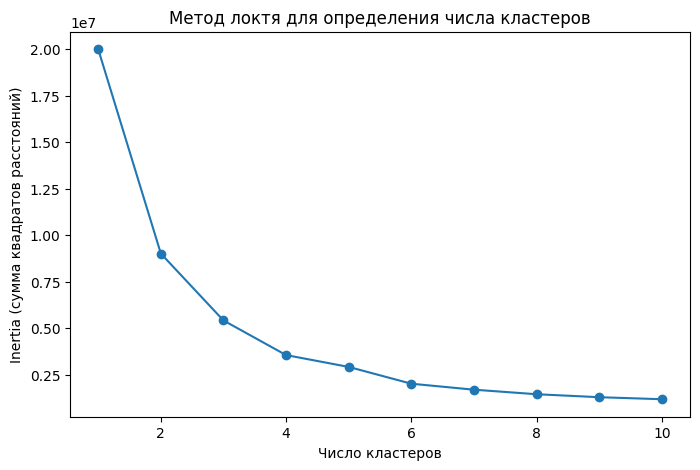

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


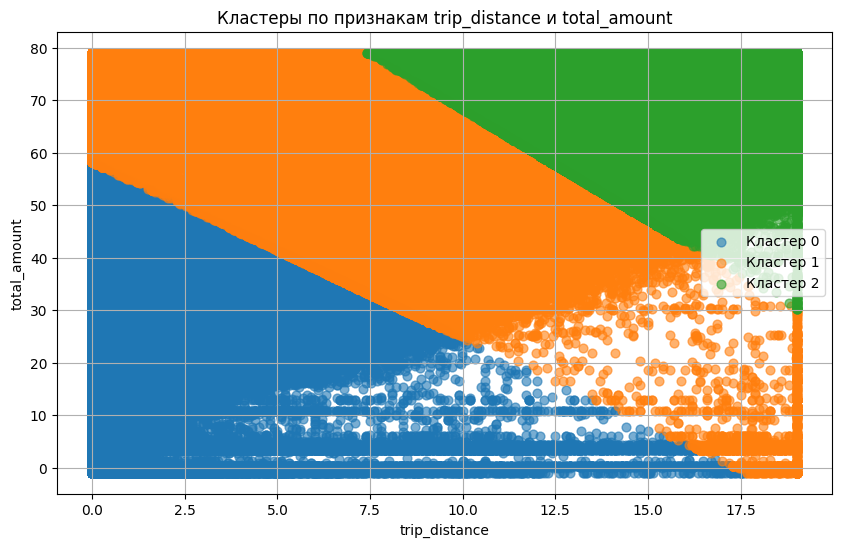

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Отбор необходимых признаков
selected_columns = ['trip_distance', 'total_amount']
data = data[selected_columns]

# Удаление пропусков
data.dropna(inplace=True)

# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Определение оптимального числа кластеров (метод локтя)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Метод локтя для определения числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia (сумма квадратов расстояний)')
plt.show()

# Выбираем число кластеров (например, 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Визуализация кластеров
plt.figure(figsize=(10, 6))

# Для каждого кластера рисуем точки с разными цветами
for cluster in range(optimal_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['trip_distance'], cluster_data['total_amount'], label=f'Кластер {cluster}', s=40, alpha=0.6)

plt.title('Кластеры по признакам trip_distance и total_amount')
plt.xlabel('trip_distance')
plt.ylabel('total_amount')
plt.legend()
plt.grid(True)
plt.show()


# Выбросы

In [ ]:
import numpy as np

# Функция для выявления выбросов
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Анализ выбросов по trip_distance
distance_outliers, lower_distance, upper_distance = detect_outliers_iqr(data, 'trip_distance')
print(f"Границы выбросов для trip_distance: {lower_distance:.2f}, {upper_distance:.2f}")
print(f"Количество выбросов по trip_distance: {len(distance_outliers)}")

# Анализ выбросов по total_amount
amount_outliers, lower_amount, upper_amount = detect_outliers_iqr(data, 'total_amount')
print(f"Границы выбросов для total_amount: {lower_amount:.2f}, {upper_amount:.2f}")
print(f"Количество выбросов по total_amount: {len(amount_outliers)}")

# Анализ выбросов по passenger_count
passenger_outliers, lower_passenger, upper_passenger = detect_outliers_iqr(data, 'passenger_count')
print(f"Границы выбросов для passenger_count: {lower_passenger:.2f}, {upper_passenger:.2f}")
print(f"Количество выбросов по passenger_count: {len(passenger_outliers)}")


Границы выбросов для trip_distance: -2.10, 19.02
Количество выбросов по trip_distance: 377080
Границы выбросов для total_amount: -0.94, 79.06
Количество выбросов по total_amount: 364114
Границы выбросов для passenger_count: -0.50, 3.50
Количество выбросов по passenger_count: 925056


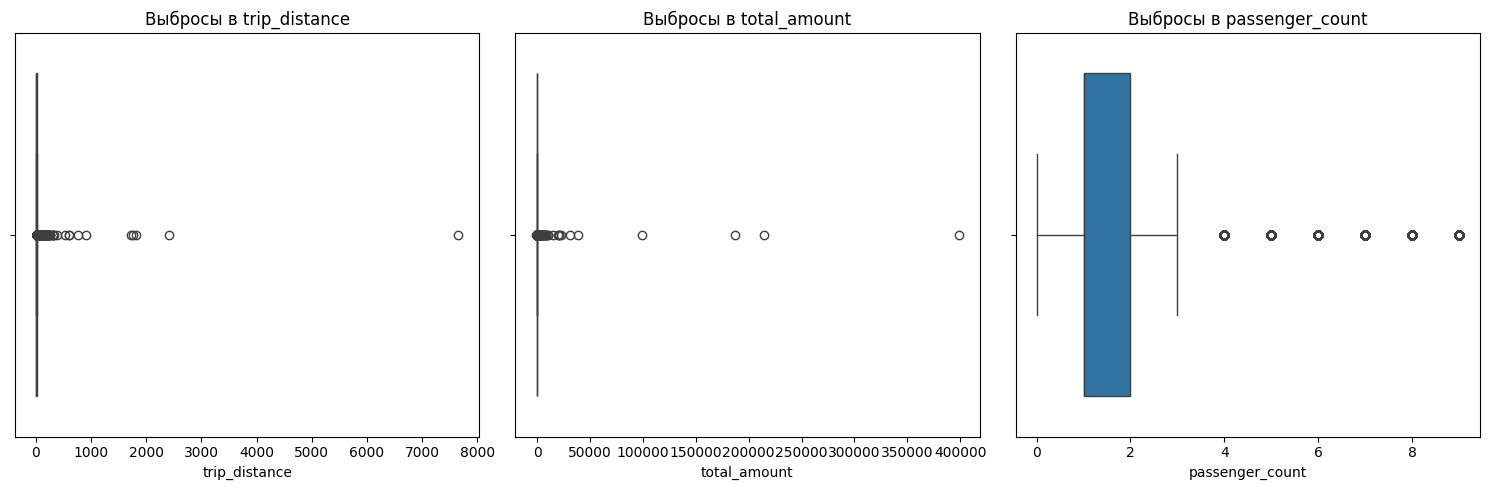

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Боксплоты
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['trip_distance'])
plt.title('Выбросы в trip_distance')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['total_amount'])
plt.title('Выбросы в total_amount')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['passenger_count'])
plt.title('Выбросы в passenger_count')

plt.tight_layout()
plt.show()


In [ ]:
data_cleaned = data[
    (data['trip_distance'] >= lower_distance) & (data['trip_distance'] <= upper_distance) &
    (data['total_amount'] >= lower_amount) & (data['total_amount'] <= upper_amount) &
    (data['passenger_count'] >= lower_passenger) & (data['passenger_count'] <= upper_passenger)
]
print(f"Осталось записей после удаления выбросов: {len(data_cleaned)}")


Осталось записей после удаления выбросов: 8529064


In [ ]:
for column, (lower, upper) in zip(
    ['trip_distance', 'total_amount', 'passenger_count'],
    [(lower_distance, upper_distance), (lower_amount, upper_amount), (lower_passenger, upper_passenger)]
):
    data[column] = np.where(data[column] < lower, lower, data[column])
    data[column] = np.where(data[column] > upper, upper, data[column])


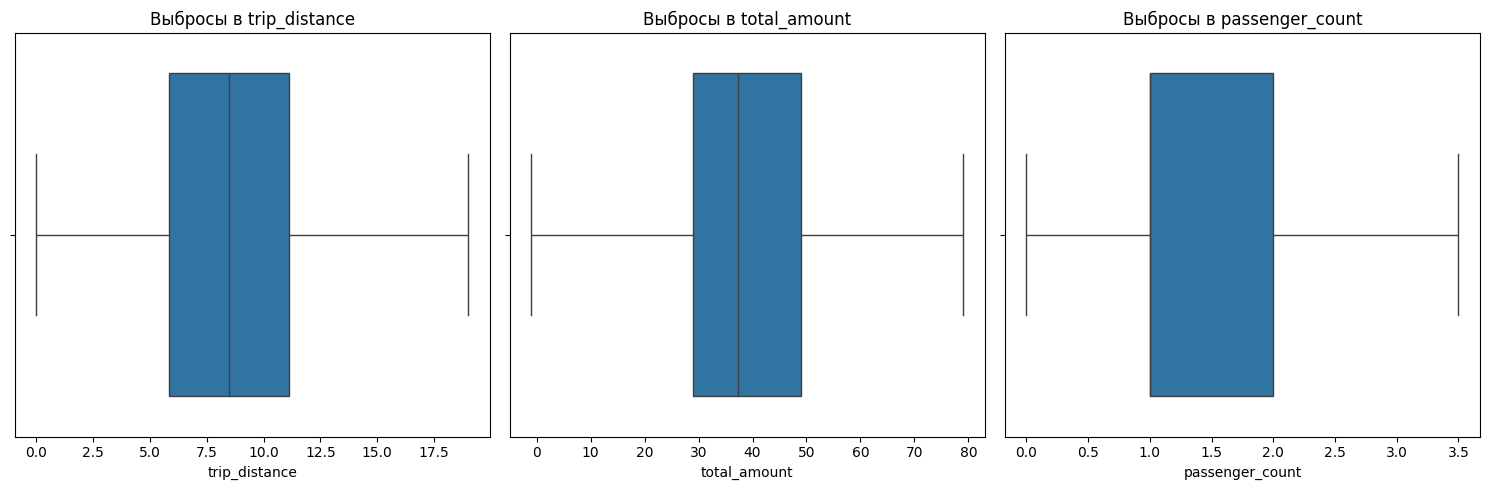

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['trip_distance'])
plt.title('Выбросы в trip_distance')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['total_amount'])
plt.title('Выбросы в total_amount')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['passenger_count'])
plt.title('Выбросы в passenger_count')

plt.tight_layout()
plt.show()

# ML Systems Design

Датасет "NYC Taxi Trips" может быть использован для создания ML-моделей, анализирующих и предсказывающих стоимость поездки, а также для решения задач кластеризации и оптимизации работы такси. Такие модели могут помочь операторам такси, клиентам и городским службам в повышении эффективности поездок и улучшении качества обслуживания.

На основе таких признаков, как расстояние поездки, количество пассажиров, время начала поездки и другие, ML-модель может предсказывать стоимость такси.
Кластеризация может использоваться для выявления схожих маршрутов или шаблонов поведения пассажиров(Определение популярных зон посадки и высадки в определённые временные промежутки.)
Группировка поездок с целью оптимизации тарифов.
Используя данные о времени поездки и расстоянии, модель может помочь в разработке оптимальных маршрутов для таксистов с учётом трафика и времени суток.

Кластеры данных и прогнозы помогут таксопаркам адаптировать цены в зависимости от спроса (динамическое ценообразование), улучшая прибыльность.Анализ поездок может помочь городским властям в выявлении перегруженных зон и планировании инфраструктуры.

Учёт данных о пробках в реальном времени,учет погодных условий позволит сделать предсказания стоимости более точными.
